# Fitting - Ajuste de datos a la mejor distribución de probabilidad
## Análisis de calidad del aire en ciudades. 
Este tipo de análisis es crucial para entender y mitigar los efectos de la contaminación en la salud pública. Este tipo de estudios consta mínimamente de los siguientes pasos:
1. Recopilación de Datos: Se recogen datos sobre la concentración de diferentes contaminantes (como dióxido de nitrógeno, dióxido de azufre, partículas PM2.5, etc.) en diferentes ubicaciones de la ciudad a lo largo del tiempo.
2. Ajuste a Distribuciones: Los datos recopilados se ajustan a diferentes distribuciones de probabilidad (por ejemplo, distribuciones log-normal o exponenciales) para modelar la variabilidad y tendencias de la contaminación.
3. Análisis y Predicciones: Con los modelos ajustados, los científicos y responsables de políticas pueden analizar patrones, hacer predicciones sobre niveles futuros de contaminación y evaluar la efectividad de medidas de control.
4. Toma de Decisiones: Los resultados del análisis se utilizan para tomar decisiones informadas sobre políticas ambientales, como la implementación de zonas de bajas emisiones, restricciones de tráfico y mejoras en la infraestructura de transporte público.

Se desarrollan aquí de manera simulada los puntos 1 y 2 del estudio. Esta simulación se efectúa en python en un jupyter notebook, que se comparte en github. Utilizaremos datos simulados para las concentraciones de partículas PM2.5 y ajustaremos estos datos a una distribución log-normal, que es común en la modelación de contaminantes del aire.

### a. Resolución del problema solo con scipy.stats

1. Simulación de Datos:

+ Simulamos datos de concentraciones de PM2.5 usando una distribución log-normal.

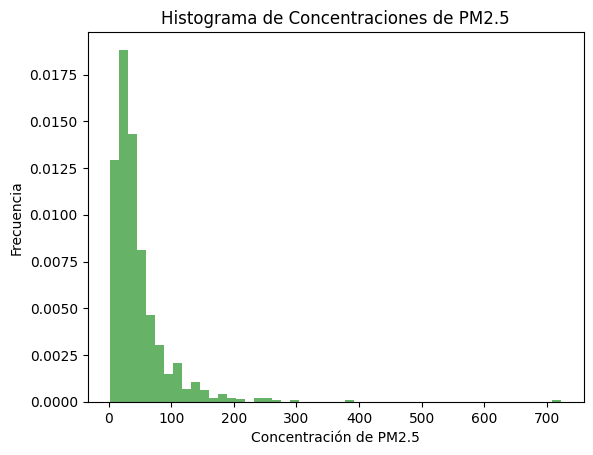

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulación de Datos de Contaminación del Aire (PM2.5)
# Generamos datos simulados con una distribución log-normal
np.random.seed(42)  # Para reproducibilidad
data_size = 1000
mean = 3.5  # Media logarítmica
sigma = 0.8  # Desviación estándar logarítmica

pm25_data = np.random.lognormal(mean, sigma, data_size)

# Visualización de los datos simulados
plt.hist(pm25_data, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histograma de Concentraciones de PM2.5')
plt.xlabel('Concentración de PM2.5')
plt.ylabel('Frecuencia')
plt.show()


2. Descubrimiento de la Mejor Distribución Ajustada:

+ Probamos varias distribuciones (normal, exponencial, log-normal, gamma, beta) para encontrar la que mejor se ajuste a los datos.

    + Ajustamos cada distribución a los datos y calculamos el error cuadrático (SSE) entre los datos ajustados y los datos reales.

+ Seleccionamos la distribución con el SSE más bajo como la mejor.

3. Visualización:

+ Visualizamos el histograma de los datos simulados junto con la mejor distribución ajustada.

+ Imprimimos el nombre de la mejor distribución y sus parámetros.

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


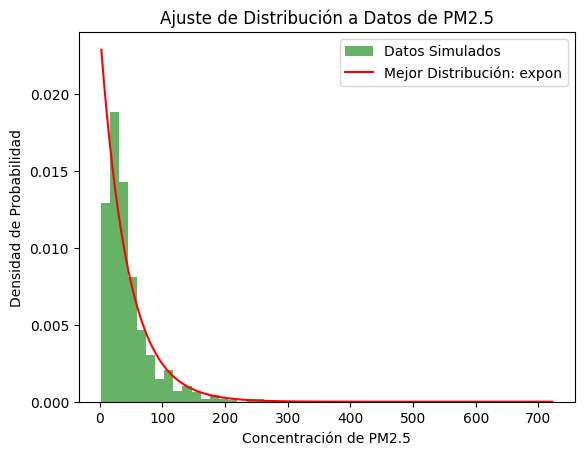

Mejor Distribución: expon
Parámetros de la Mejor Distribución: (2.4768463748768963, 43.71068782002568)


In [3]:
# Listado de distribuciones para probar
distributions = [stats.norm, stats.expon, stats.lognorm, stats.gamma, stats.beta]

# Inicialización de variables para almacenar los resultados
best_distribution = None
best_params = None
best_sse = np.inf

# Generamos valores x para la visualización
x = np.linspace(min(pm25_data), max(pm25_data), 1000)

# Prueba de cada distribución
for distribution in distributions:
    # Ajuste de la distribución a los datos
    params = distribution.fit(pm25_data)
    
    # Generación de valores teóricos basados en la distribución ajustada
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    pdf_fitted = distribution.pdf(x, loc=loc, scale=scale, *arg)
    
    # Cálculo del error cuadrático (SSE) entre los datos ajustados y los datos reales
    sse = np.sum(np.power(pm25_data - pdf_fitted, 2.0))
    
    # Almacenamiento de la mejor distribución basada en el SSE más bajo
    if best_sse > sse:
        best_distribution = distribution
        best_params = params
        best_sse = sse

# Visualización de los resultados
plt.hist(pm25_data, bins=50, density=True, alpha=0.6, color='g', label='Datos Simulados')

# Generación de la mejor distribución ajustada
pdf_best = best_distribution.pdf(x, loc=best_params[-2], scale=best_params[-1], *best_params[:-2])
plt.plot(x, pdf_best, 'r-', label=f'Mejor Distribución: {best_distribution.name}')

plt.title('Ajuste de Distribución a Datos de PM2.5')
plt.xlabel('Concentración de PM2.5')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

# Resultados del ajuste
print(f'Mejor Distribución: {best_distribution.name}')
print(f'Parámetros de la Mejor Distribución: {best_params}')


_________________________

### b. Resolución del problema del aire con Fitter

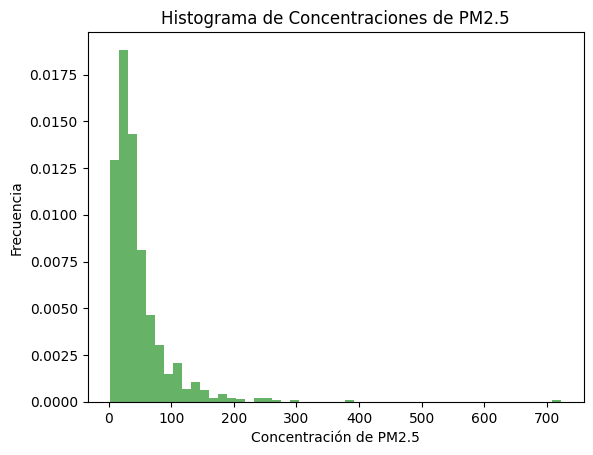

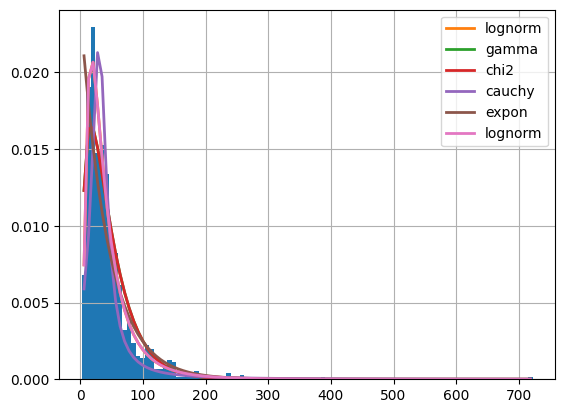

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions

# Simulación de Datos de Contaminación del Aire (PM2.5)
np.random.seed(42)  # Para reproducibilidad
data_size = 1000
mean = 3.5  # Media logarítmica
sigma = 0.8  # Desviación estándar logarítmica

pm25_data = np.random.lognormal(mean, sigma, data_size)

# Visualización de los datos simulados
plt.hist(pm25_data, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histograma de Concentraciones de PM2.5')
plt.xlabel('Concentración de PM2.5')
plt.ylabel('Frecuencia')
plt.show()

# Ajuste de distribuciones usando Fitter
f = Fitter(pm25_data, distributions=get_common_distributions())
f.fit()

# Imprimir resumen de los mejores ajustes
f.summary()

# Visualización de la mejor distribución ajustada
f.plot_pdf(names=None, Nbest=1)
plt.show()


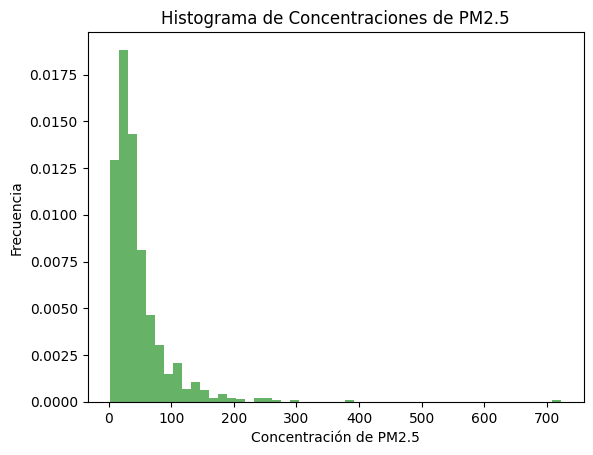

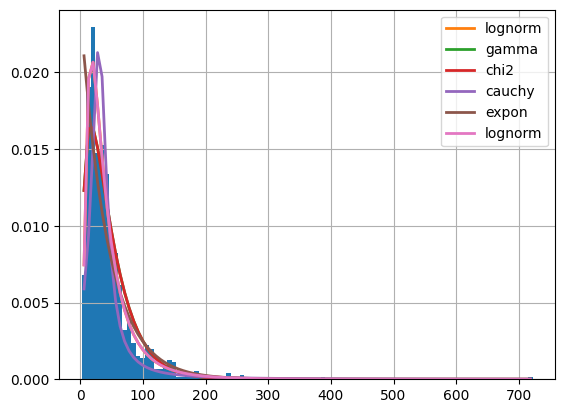

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000244  1886.957838  1896.773349     inf      0.164774   
chi2             0.000106  2886.713905  2901.437171     inf      0.063931   
expon            0.000316  2405.886403  2415.701913     inf      0.105682   
exponpow         0.000523  3406.279470  3421.002736     inf      0.156132   
gamma            0.000106  2886.713732  2901.436997     inf      0.063931   
lognorm          0.000027  2088.777153  2103.500419     inf      0.017126   
norm             0.000588  7622.967834  7632.783344     inf      0.184365   
powerlaw         0.000986  1417.698661  1432.421926     inf      0.378191   
rayleigh         0.000420  6502.659864  6512.475375     inf      0.192452   
uniform          0.001588  1319.749862  1329.565373     inf      0.782836   

              ks_pvalue  
cauchy     3.397277e-24  
chi2       5.370539e-04  
expon      3.526588e-10  
exponpow   9.336667e-22  
gamma      5.369990e-0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions

# Simulación de Datos de Contaminación del Aire (PM2.5)
np.random.seed(42)  # Para reproducibilidad
data_size = 1000
mean = 3.5  # Media logarítmica
sigma = 0.8  # Desviación estándar logarítmica

pm25_data = np.random.lognormal(mean, sigma, data_size)

# Visualización de los datos simulados
plt.hist(pm25_data, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histograma de Concentraciones de PM2.5')
plt.xlabel('Concentración de PM2.5')
plt.ylabel('Frecuencia')
plt.show()

# Ajuste de distribuciones usando Fitter
f = Fitter(pm25_data, distributions=get_common_distributions())
f.fit()

# Imprimir resumen de los mejores ajustes
f.summary()

# Visualización de la mejor distribución ajustada
f.plot_pdf(names=None, Nbest=1)
plt.show()

# Imprimir resultados en forma de tabla
results = f.df_errors
print(results)


__________________________